# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Input Nama]
- **Email:** [Input Email]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Di daerah mana jumlah pembelian yang paling banyak dan paling sedikit
- Di daerah mana yang memiliki pengeluaran terbesar dan terendah
- Produk apa yang paling laris berdasarkan penjualan
- Product dengan omset terkecil dan terbesar
- Bagaimana performa penjualan

## Import Semua Packages/Library yang Digunakan

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [83]:
customer_df = pd.read_csv("E-commerce-public-dataset/E-Commerce Public Dataset/customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [84]:
geolocation_df = pd.read_csv("E-commerce-public-dataset/E-Commerce Public Dataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [85]:
order_items_df = pd.read_csv("E-commerce-public-dataset/E-Commerce Public Dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [86]:
order_payment_df = pd.read_csv("E-commerce-public-dataset/E-Commerce Public Dataset/order_payments_dataset.csv")
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [87]:
order_reviews_df = pd.read_csv("E-commerce-public-dataset/E-Commerce Public Dataset/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [88]:
order_df = pd.read_csv("E-commerce-public-dataset/E-Commerce Public Dataset/orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [89]:
product_category_name_tl_df = pd.read_csv("E-commerce-public-dataset/E-Commerce Public Dataset/product_category_name_translation.csv")
product_category_name_tl_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [90]:
product_df = pd.read_csv("E-commerce-public-dataset/E-Commerce Public Dataset/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [91]:
sellers_df = pd.read_csv("E-commerce-public-dataset/E-Commerce Public Dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Customer_dataset

In [92]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [93]:
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [94]:
customer_df.duplicated().sum()

0

In [95]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### geolocation_dataset

In [96]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [97]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [98]:
geolocation_df.duplicated().sum()

261831

In [99]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### order_items_dataset

In [100]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [101]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [102]:
order_items_df.duplicated().sum()

0

In [103]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### order_payment_dataset

In [104]:
order_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [105]:
order_payment_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [106]:
order_payment_df.duplicated().sum()

0

In [107]:
order_payment_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### order_reviews_dataset

In [108]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [109]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [110]:
order_reviews_df.duplicated().sum()

0

In [111]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### orders_dataset

In [112]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [113]:
order_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [114]:
order_df.duplicated().sum()

0

In [115]:
order_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### product_category_name_translation

In [116]:
product_category_name_tl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [117]:
product_category_name_tl_df.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [118]:
product_category_name_tl_df.duplicated().sum()

0

In [119]:
product_category_name_tl_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### sellers_dataset

In [120]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [121]:
sellers_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [122]:
sellers_df.duplicated().sum()

0

In [123]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

anomali yang ditemukan

geolocation_df

	terdapat data duplicat

order_items_df

	shipping_limit_date  112650 non-null  object  --> diganti jadi datetime
order_reviews_df

	review_creation_date     99224 non-null  object --> diganti jadi datetime
	review_answer_timestamp  99224 non-null  object --> diganti jadi datetime
	
	review_comment_title       87656 --> data yang isna()?
	review_comment_message     58247 --> data yang isna()?

order_df

	order_purchase_timestamp       99441 non-null  object --> diganti jadi datetime
 	order_approved_at              99281 non-null  object --> diganti jadi datetime
	order_delivered_carrier_date   97658 non-null  object --> diganti jadi datetime
 	order_delivered_customer_date  96476 non-null  object --> diganti jadi datetime
 	order_estimated_delivery_date  99441 non-null  object --> diganti jadi datetime

	[data yang isna()]
	
		order_approved_at                 160
		order_delivered_carrier_date     1783
		order_delivered_customer_date    2965


data yang sama adalah kota kota dan kode zip pos, hal ini terjadi karena geolocation yang berdekatan. hal ini tidak perlu diganti karena data ini digunakan sebagai penunjuk lokasi dasri geolocation hingga masih valid

In [124]:
geolocation_df[geolocation_df.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [125]:
columns_order_item = ["shipping_limit_date"]

for column in columns_order_item:
    order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [126]:
columns_order_review = ['review_creation_date','review_answer_timestamp']

for column in columns_order_review:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [127]:
columns_order = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']

for column in columns_order:
    order_df[column] = pd.to_datetime(order_df[column])

order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Mengurus data yang hilang

In [128]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [129]:
order_reviews_df.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

In [130]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42


In [131]:
order_reviews_df.review_comment_message.value_counts()

review_comment_message
Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                            

In [132]:
order_reviews_df.fillna(value="no comment", inplace=True)

In [133]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)

### Explore ...

In [134]:
customer_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
37686,f3c2cc8a1f85cd318468829dbfbd6eea,ce8739bf18732110c885e3e034423aa1,25051,duque de caxias,RJ
93014,43f4903d8905cb8f4d58ee79bd166e93,226919c9835e427d6e2839519262f522,13330,indaiatuba,SP
98068,b2f351b578d5fa960f941afe5379cedc,0f00ec227ecc76530782aa0fcb87f0e2,1507,sao paulo,SP
62943,093db840532a831a3a7740a8c71a24cd,c2b7cba7d0a5320b4fb179c03a01925a,71070,brasilia,DF
18066,bd82bc59b4b34a472f0e65bc1aaaad2a,82f2cef06e08b1f458d5213fa9c83331,21510,rio de janeiro,RJ


In [135]:
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [136]:
customer_df.customer_id.is_unique

True

In [137]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [138]:
customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [139]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
140006,5776,-23.635145,-46.742680,sao paulo,SP
745540,61948,-3.906388,-38.682843,maranguape,CE
480482,24754,-22.868068,-43.019795,sao goncalo,RJ
158565,6321,-23.535923,-46.834708,carapicuiba,SP
476323,24325,-22.882510,-43.035669,niteroi,RJ


In [140]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
35674,50c331850829a3e71ba43b46a7785a16,1,3f90ef42e637c17203bd0ee040c16de0,d2374cbcbb3ca4ab1086534108cc3ab7,2017-09-05 05:45:05,28.90,11.85
29495,43126a662685b18c4248ff1c8c58ca94,1,7c5eedf954659c8014c0671ba5e1b99b,d1c281d3ae149232351cd8c8cc885f0d,2017-03-29 23:10:29,41.99,29.39
92002,d0c8f9db386ca29a7033d2fddc2451b1,1,89321f94e35fc6d7903d36f74e351d40,16090f2ca825584b5a147ab24aa30c86,2018-05-04 10:29:45,27.90,7.39
61802,8d04cc6c75bba21874268deda821055d,1,79366d6a24de9351b7ca6e3cf75a68ec,cc3d14116804f7209f3884f6367f1152,2017-07-24 06:10:25,193.00,23.67
79904,b5b9596fafc9950c04548f635451d6c6,1,8fa67e5cb309b9cd7b4438e15948bdb2,9b013e03b2ab786505a1d3b5c0756754,2018-06-15 12:01:27,11.00,18.23


In [141]:
order_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [142]:
order_items_df.groupby(by='product_id').order_id.nunique().sort_values(ascending=False)

product_id
99a4788cb24856965c36a24e339b6058    467
aca2eb7d00ea1a7b8ebd4e68314663af    431
422879e10f46682990de24d770e7f83d    352
d1c427060a0f73f6b889a5c7c61f2ac4    323
389d119b48cf3043d311335e499d9c6b    311
                                   ... 
69c58bb97c8d7b75fad9e6c1d391fda6      1
69c3a9ec3f1094ad11505df27ddad569      1
69c2f05e34d543dc71cfe745bfac8499      1
69c2cca014581e7e3756142963a69313      1
fffe9eeff12fcbd74a2f2b007dde0c58      1
Name: order_id, Length: 32951, dtype: int64

In [143]:
order_payment_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
32232,877ea935e0ce1786032071a571b40cf3,1,credit_card,1,64.10
69304,0a32ad9d3be8a5b1ce582225aa1cd166,1,credit_card,4,41.59
66055,9d14efbb0c50e58aa2098e5338df7575,1,credit_card,6,109.27
12351,6fa8043bdb80a1aed9ed56be51399cfe,1,credit_card,1,87.64
421,cbb39c59f8084f27c248bd5c3a1cde7b,1,boleto,1,244.35


In [144]:
order_payment_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [145]:
order_payment_df.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [146]:
order_reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
17505,c5d3de4e655bae028623a9bb0b96270b,6166489270fe109062267b9e022c0292,5,no comment,no comment,2017-04-18,2017-04-18 20:43:51
77418,c2cbab3b8bb69891ddb2652469b6eabd,ed77ae1d4803934a1131cadffb78b41b,4,no comment,no comment,2017-10-20,2017-10-23 11:43:09
76001,6275cff8aa2a1d03e577540a950bb674,6f4c29759e17be1153ee866b44393853,5,no comment,no comment,2018-06-14,2018-06-15 12:20:07
21234,d593def3a84f062d935232709eebde1c,44ecd2ebe54e3c23da26345bfcf1c919,4,no comment,no comment,2018-06-21,2018-06-21 20:29:31
29130,2308d728ca55d129d9130e42ce28b46c,a979f259e3f69ceb4f856111481db7e7,5,no comment,no comment,2018-02-08,2018-02-09 11:05:26


In [147]:
order_reviews_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,no comment,no comment,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [148]:
order_reviews_df.groupby(by='review_score').order_id.nunique().sort_values(ascending=False)

review_score
5    57076
4    19098
1    11393
3     8160
2     3148
Name: order_id, dtype: int64

In [149]:
order_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
18736,fca198bd1d114ed57b786f347a0e4a61,aa664b5b74721f18d25d5c15b68b5093,delivered,2017-07-04 13:07:02,2017-07-04 13:15:19,2017-07-07 15:57:52,2017-08-01 18:43:28,2017-08-03
65804,aad86d958ecbedd8da621bf570b1ab1a,762b44d8a082596c909aed7fda962505,delivered,2018-06-25 22:44:18,2018-06-26 23:08:15,2018-06-27 10:16:00,2018-07-04 16:29:00,2018-07-20
32410,385ee6bd014c3ca0b3be6215f97349d0,f90aaea7d2f604616c2f3cf4af915d7b,delivered,2018-06-21 16:49:59,2018-06-23 01:15:51,2018-06-25 14:45:00,2018-06-26 18:42:37,2018-07-04
14538,a686da5114d82b27240c406fcb88823a,6ed07a89028c70e72899916c5ad3274d,delivered,2018-03-22 16:08:10,2018-03-22 16:50:33,2018-03-23 19:08:59,2018-03-30 00:38:35,2018-04-11
73130,3e65f930729bc14824ce41dc1e8084d1,bbd2d195aa7eaf73da52f0095c5c1fe7,delivered,2017-07-11 09:55:09,2017-07-11 10:10:15,2017-07-12 19:04:01,2017-07-21 20:03:21,2017-08-09


In [150]:
delivery_time = order_df["order_delivered_customer_date"] - order_df["order_delivered_carrier_date"]
delivery_time


0        6 days 01:30:13
1       12 days 00:56:45
2        9 days 04:16:29
3        9 days 10:48:43
4        1 days 22:30:28
              ...       
99436    7 days 03:49:58
99437   20 days 18:15:14
99438   23 days 14:31:51
99439   13 days 07:57:51
99440    6 days 14:56:31
Length: 99441, dtype: timedelta64[ns]

In [151]:
order_df["delivery_time"] = delivery_time
order_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
58453,d568698e0ce60cca292f739e9a60e8d0,64058e47b0b554f449a7c61c432b56f0,delivered,2017-11-03 08:44:37,2017-11-03 09:06:04,2017-11-08 18:57:01,2017-11-18 01:05:00,2017-12-05,9 days 06:07:59
83821,08a19256bfef2a2b1f0fc654723a9c71,8e75040b2365871c96071a3baa129e93,delivered,2018-07-01 22:41:26,2018-07-01 22:50:18,2018-07-03 13:04:00,2018-07-10 15:28:37,2018-08-09,7 days 02:24:37
94474,216abf06d82d5abe6b9f5eaffeba374b,d6bf7156a0ebba7f8fa34df19e4ed24e,delivered,2018-03-14 16:13:12,2018-03-15 16:11:11,2018-03-16 21:46:43,2018-03-29 15:45:53,2018-04-12,12 days 17:59:10
84406,ae237f55b03395beb370fa960c98dcf0,992b4f232abcd759be707c69cba05805,delivered,2018-01-30 18:54:23,2018-01-31 14:31:43,2018-02-06 14:51:37,2018-02-16 15:08:12,2018-02-22,10 days 00:16:35
48898,4a46b5e1fafd4a6ab3f773494ba1b331,c26a54d3ceaafdeb3b5e6c366399e74c,delivered,2018-01-29 11:08:33,2018-01-29 13:17:32,2018-02-01 20:49:59,2018-02-02 22:21:09,2018-02-14,1 days 01:31:10


In [152]:
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 04:16:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9 days 10:48:43
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1 days 22:30:28


#### explorasi tambahan

In [153]:
order_report_df = order_df[['customer_id']]
order_report_df = pd.merge(
    order_report_df,
    customer_df,
    left_on='customer_id',
    right_on='customer_id',
    how='left'
)
order_report_df


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...
99436,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [154]:
order_report_df.groupby(by='customer_city').size().reset_index(name='total').sort_values(by='total',ascending=False)

,customer_city,total
3597,sao paulo,15540
3155,rio de janeiro,6882
453,belo horizonte,2773
558,brasilia,2131
1143,curitiba,1521
...,...,...
1578,ibiara,1
3164,rio espera,1
3163,rio dos indios,1
3162,rio dos cedros,1


In [155]:
product_report_df = order_df[['order_id','customer_id']]
product_report_df = pd.merge(
    order_items_df,
    product_report_df,
    left_on='order_id',
    right_on='order_id',
    how='left'
)
product_report_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655


In [156]:
product_report_df = pd.merge(
    product_report_df,
    customer_df,
    on='customer_id'
)
product_report_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,13289,vinhedo,SP


In [157]:
product_report_df = pd.merge(
    product_report_df,
    product_df[['product_id','product_category_name']],
    on='product_id',
    how='left'
)
product_report_df = pd.merge(
    product_report_df,
    product_category_name_tl_df,
    on='product_category_name',
    how='left'
)
product_report_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,ferramentas_jardim,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,utilidades_domesticas,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,informatica_acessorios,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,esporte_lazer,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,informatica_acessorios,computers_accessories


In [158]:
product_report_df = pd.merge(
    product_report_df,
    order_df[['order_id','order_purchase_timestamp']],
    on='order_id',
    how='left'
)
product_report_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_category_name_english,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,cool_stuff,cool_stuff,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,pet_shop,pet_shop,2017-04-26 10:53:06
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,moveis_decoracao,furniture_decor,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,perfumaria,perfumery,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,ferramentas_jardim,garden_tools,2017-02-04 13:57:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,utilidades_domesticas,housewares,2018-04-23 13:57:06
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,informatica_acessorios,computers_accessories,2018-07-14 10:26:46
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,esporte_lazer,sports_leisure,2017-10-23 17:07:56
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,informatica_acessorios,computers_accessories,2017-08-14 23:02:59


In [188]:
product_report_df.to_csv("product_report_data.csv", index=False)

In [159]:
purchased_per_city_df = product_report_df.groupby('customer_city')['price'].sum().reset_index(name='total').sort_values(by='total', ascending=False)
purchased_per_city_df

,customer_city,total
3588,sao paulo,1914924.54
3147,rio de janeiro,992538.86
452,belo horizonte,355611.13
557,brasilia,301920.25
1141,curitiba,211738.06
...,...,...
1953,jenipapo de minas,7.48
3395,santo antonio do rio abaixo,6.00
3666,senador jose porfirio,6.00
3213,sabaudia,5.90


In [160]:
purchased_per_state_df = product_report_df.groupby('customer_state')['price'].sum().reset_index(name='total').sort_values(by='total', ascending=False)
purchased_per_state_df

,customer_state,total
25,SP,5202955.05
18,RJ,1824092.67
10,MG,1585308.03
22,RS,750304.02
17,PR,683083.76
23,SC,520553.34
4,BA,511349.99
6,DF,302603.94
8,GO,294591.95
7,ES,275037.31


In [161]:
order_per_city_df = product_report_df.groupby('customer_city').size().reset_index(name='total').sort_values(by='total', ascending=False)
order_per_city_df

,customer_city,total
3588,sao paulo,17808
3147,rio de janeiro,7837
452,belo horizonte,3144
557,brasilia,2392
1141,curitiba,1751
...,...,...
1582,ibipeba,1
1586,ibiracatu,1
3217,sacra familia do tingua,1
3216,saboeiro,1


In [162]:
order_per_state_df = product_report_df.groupby('customer_state').size().reset_index(name='total').sort_values(by='total', ascending=False)
order_per_state_df

,customer_state,total
25,SP,47449
18,RJ,14579
10,MG,13129
22,RS,6235
17,PR,5740
23,SC,4176
4,BA,3799
6,DF,2406
8,GO,2333
7,ES,2256


In [163]:
product_laris_item_df = product_report_df.groupby(by='product_category_name_english').size().reset_index(name='total').sort_values(by='total', ascending=False)
product_laris_item_df

,product_category_name_english,total
7,bed_bath_table,11115
43,health_beauty,9670
65,sports_leisure,8641
39,furniture_decor,8334
15,computers_accessories,7827
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,14
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8


In [164]:
product_laris_df = product_report_df.groupby(by='product_category_name_english')['price'].sum().reset_index(name='total').sort_values(by='total',ascending=False)
product_laris_df

,product_category_name_english,total
43,health_beauty,1258681.34
70,watches_gifts,1205005.68
7,bed_bath_table,1036988.68
65,sports_leisure,988048.97
15,computers_accessories,911954.32
...,...,...
35,flowers,1110.04
46,home_comfort_2,760.27
11,cds_dvds_musicals,730.00
29,fashion_childrens_clothes,569.85


In [165]:
purchased_per_time = product_report_df.groupby(pd.Grouper(key='order_purchase_timestamp', freq='M')).size().reset_index(name='total').sort_values(by='order_purchase_timestamp')
purchased_per_time

,order_purchase_timestamp,total
0,2016-09-30,6
1,2016-10-31,363
2,2016-11-30,0
3,2016-12-31,1
4,2017-01-31,955
5,2017-02-28,1951
6,2017-03-31,3000
7,2017-04-30,2684
8,2017-05-31,4136
9,2017-06-30,3583


## Visualization & Explanatory Analysis

### Pertanyaan 1: Di daerah mana jumlah pembelian yang paling banyak dan paling sedikit

In [166]:
order_per_city_df.sort_values(by='total',ascending=False).head(5)

,customer_city,total
3588,sao paulo,17808
3147,rio de janeiro,7837
452,belo horizonte,3144
557,brasilia,2392
1141,curitiba,1751


In [167]:
order_per_city_df.sort_values(by='total', ascending=True).head(5)

,customer_city,total
2055,lagoao,1
592,buriti alegre,1
3755,sulina,1
588,buique,1
587,bugre,1


C:\Users\ASUS\AppData\Local\Temp\ipykernel_38468\2576200026.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_38468\2576200026.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


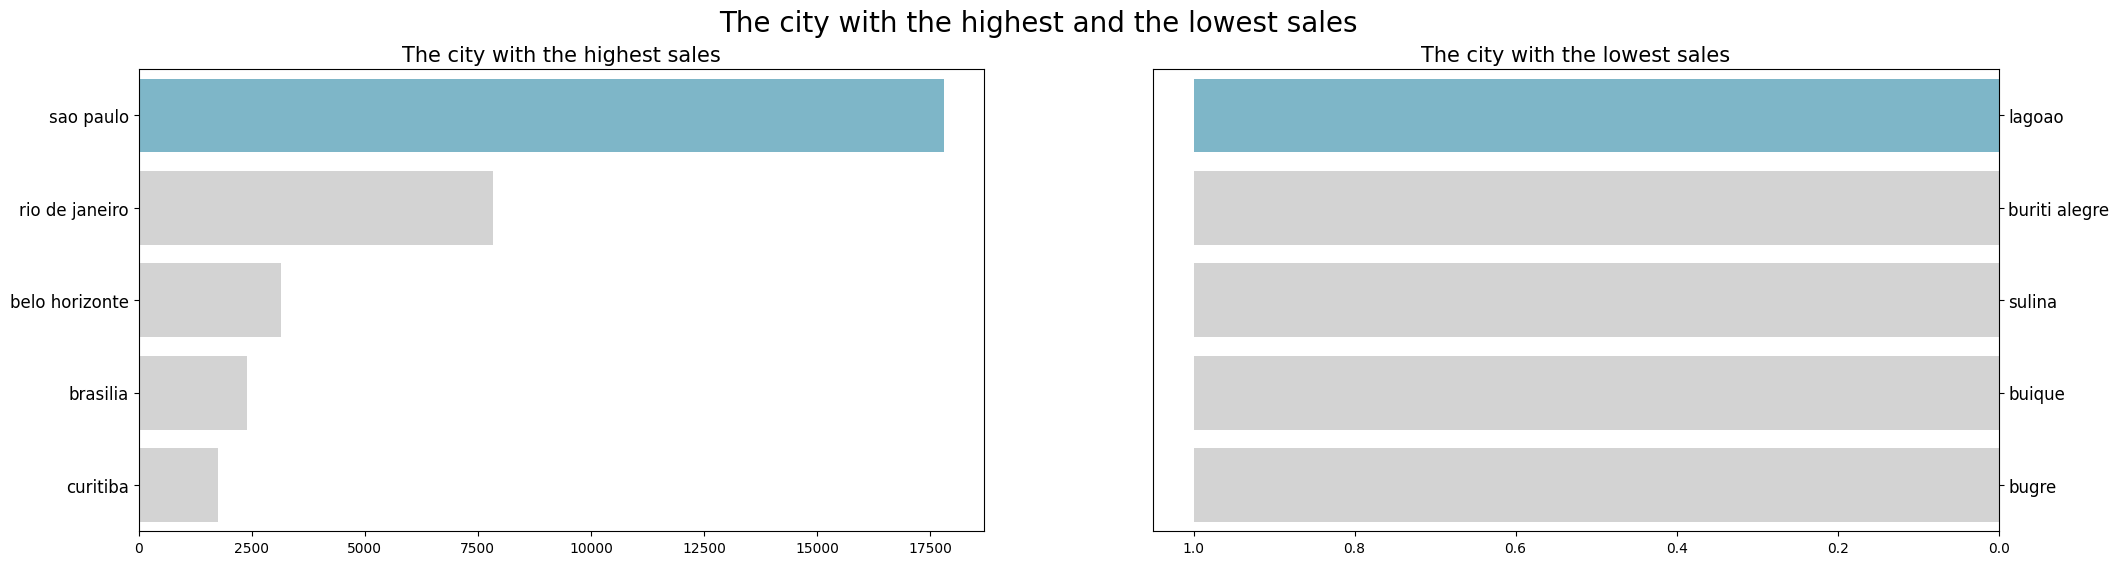

In [168]:
fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x = 'total',
    y = 'customer_city',
    data = order_per_city_df.sort_values(by='total', ascending=False).head(5),
    palette=colors,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("The city with the highest sales", loc='center', fontsize=15)
ax[0].tick_params(axis = 'y', labelsize = 12)

sns.barplot(
    x = 'total',
    y = 'customer_city',
    data = order_per_city_df.sort_values(by='total', ascending=True).head(5),
    palette=colors,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_title("The city with the lowest sales", loc='center', fontsize=15)
ax[1].tick_params(axis = 'y', labelsize=12)

plt.suptitle("The city with the highest and the lowest sales", fontsize=20)
plt.show()

In [169]:
order_per_state_df.sort_values(by='total', ascending=False).head(5)

,customer_state,total
25,SP,47449
18,RJ,14579
10,MG,13129
22,RS,6235
17,PR,5740


In [170]:
order_per_state_df.sort_values(by='total', ascending=True).head(5)

,customer_state,total
21,RR,52
3,AP,82
0,AC,92
2,AM,165
20,RO,278


C:\Users\ASUS\AppData\Local\Temp\ipykernel_38468\555423374.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_38468\555423374.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


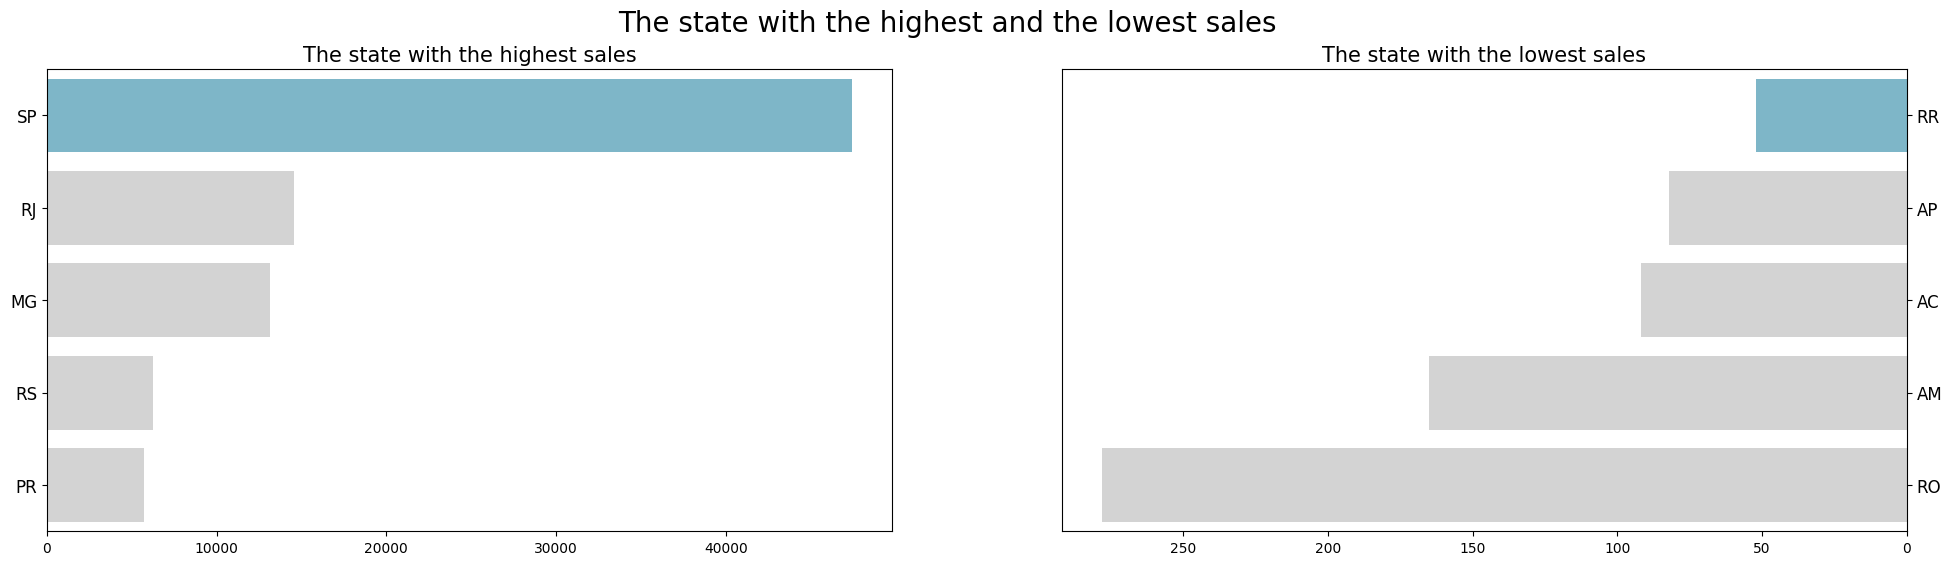

In [171]:
fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x = 'total',
    y = 'customer_state',
    data = order_per_state_df.sort_values(by='total', ascending=False).head(5),
    palette=colors,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("The state with the highest sales", loc='center', fontsize=15)
ax[0].tick_params(axis = 'y', labelsize = 12)

sns.barplot(
    x = 'total',
    y = 'customer_state',
    data = order_per_state_df.sort_values(by='total', ascending=True).head(5),
    palette=colors,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_title("The state with the lowest sales", loc='center', fontsize=15)
ax[1].tick_params(axis = 'y', labelsize=12)

plt.suptitle("The state with the highest and the lowest sales", fontsize=20)
plt.show()

### Pertanyaan 2 : Di daerah mana yang memiliki pengeluaran terbesar dan terendah

In [172]:
purchased_per_city_df.sort_values(by='total', ascending=False).head(5)

,customer_city,total
3588,sao paulo,1914924.54
3147,rio de janeiro,992538.86
452,belo horizonte,355611.13
557,brasilia,301920.25
1141,curitiba,211738.06


In [173]:
purchased_per_city_df.sort_values(by='total', ascending=True).head(5)

,customer_city,total
2920,polo petroquimico de triunfo,5.60
3213,sabaudia,5.90
3395,santo antonio do rio abaixo,6.00
3666,senador jose porfirio,6.00
1953,jenipapo de minas,7.48


C:\Users\ASUS\AppData\Local\Temp\ipykernel_38468\3851836911.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_38468\3851836911.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


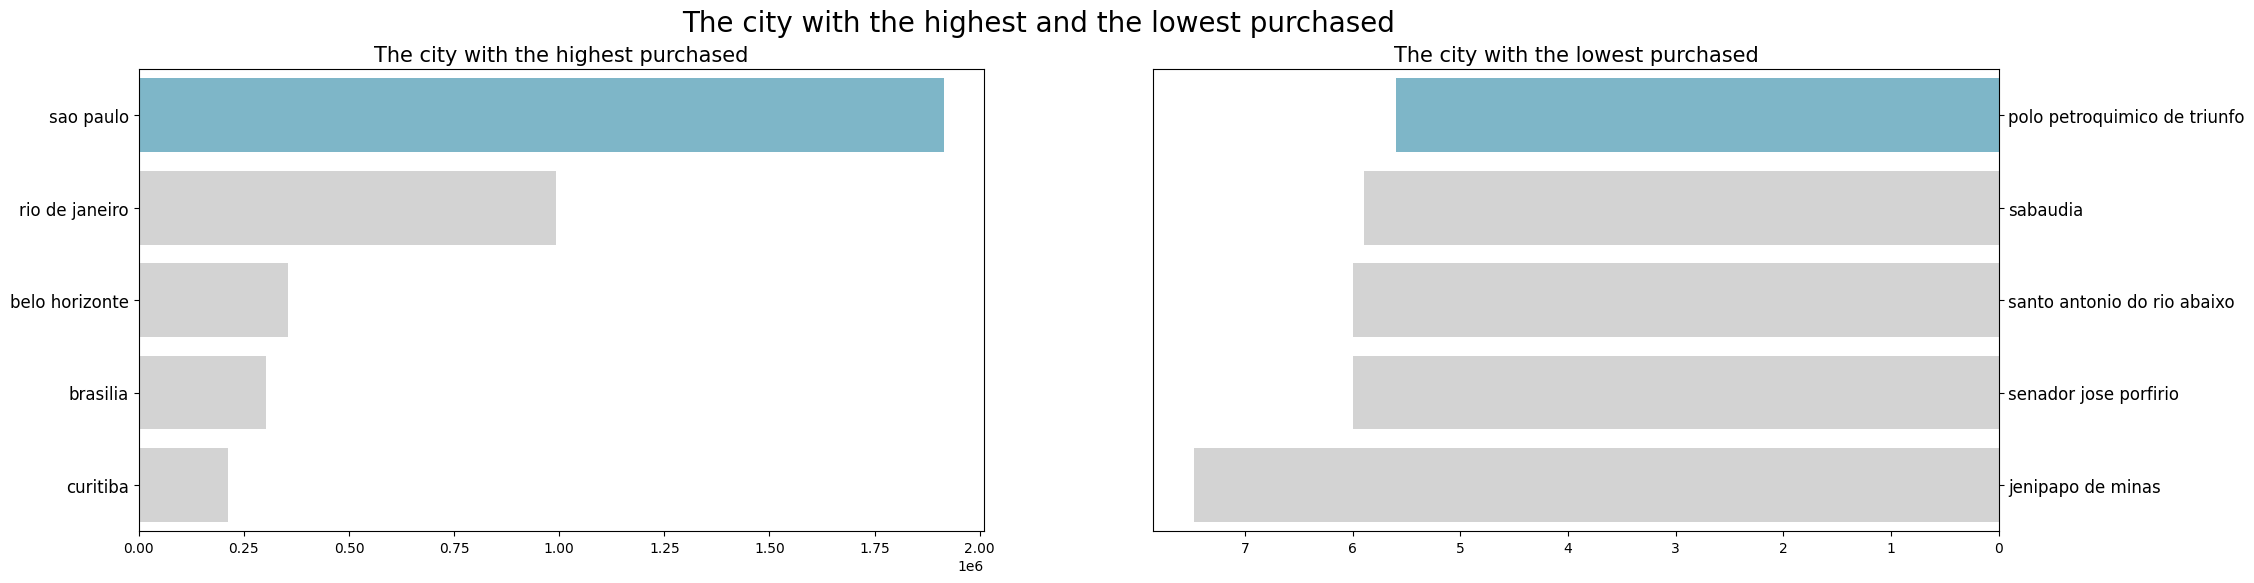

In [174]:
fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x = 'total',
    y = 'customer_city',
    data = purchased_per_city_df.sort_values(by='total', ascending=False).head(5),
    palette=colors,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("The city with the highest purchased", loc='center', fontsize=15)
ax[0].tick_params(axis = 'y', labelsize = 12)

sns.barplot(
    x = 'total',
    y = 'customer_city',
    data = purchased_per_city_df.sort_values(by='total', ascending=True).head(5),
    palette=colors,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_title("The city with the lowest purchased", loc='center', fontsize=15)
ax[1].tick_params(axis = 'y', labelsize=12)

plt.suptitle("The city with the highest and the lowest purchased", fontsize=20)
plt.show()

In [175]:
purchased_per_state_df.sort_values(by='total', ascending=False).head(5)

,customer_state,total
25,SP,5202955.05
18,RJ,1824092.67
10,MG,1585308.03
22,RS,750304.02
17,PR,683083.76


In [176]:
purchased_per_state_df.sort_values(by='total', ascending=True).head(5)

,customer_state,total
21,RR,7829.43
3,AP,13474.30
0,AC,15982.95
2,AM,22356.84
20,RO,46140.64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_38468\3433891516.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_38468\3433891516.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


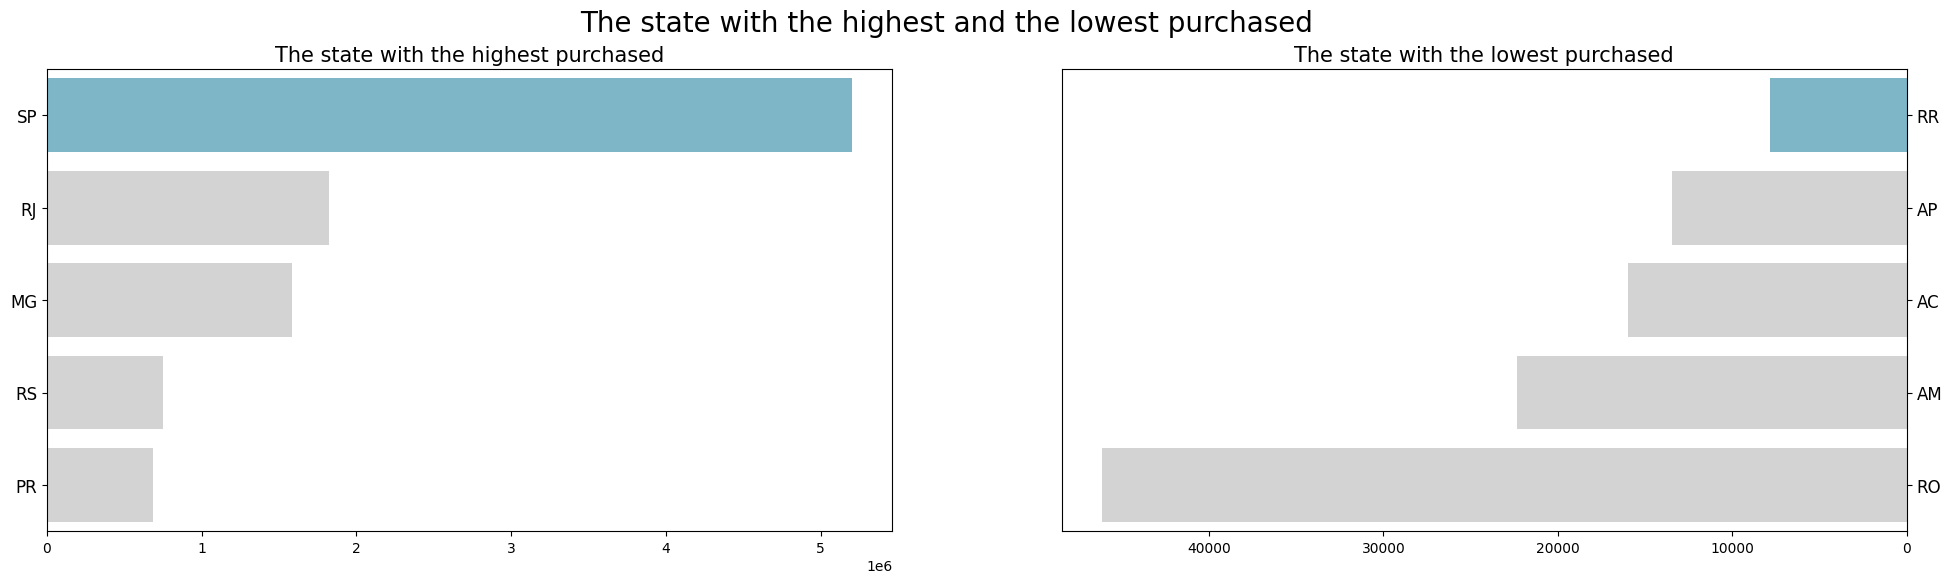

In [177]:
fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x = 'total',
    y = 'customer_state',
    data = purchased_per_state_df.sort_values(by='total', ascending=False).head(5),
    palette=colors,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("The state with the highest purchased", loc='center', fontsize=15)
ax[0].tick_params(axis = 'y', labelsize = 12)

sns.barplot(
    x = 'total',
    y = 'customer_state',
    data = purchased_per_state_df.sort_values(by='total', ascending=True).head(5),
    palette=colors,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_title("The state with the lowest purchased", loc='center', fontsize=15)
ax[1].tick_params(axis = 'y', labelsize=12)

plt.suptitle("The state with the highest and the lowest purchased", fontsize=20)
plt.show()

### Pertanyaan 3 : Produk apa yang paling laris berdasarkan penjualan

In [178]:
product_laris_item_df.sort_values(by='total', ascending=False).head(5)

,product_category_name_english,total
7,bed_bath_table,11115
43,health_beauty,9670
65,sports_leisure,8641
39,furniture_decor,8334
15,computers_accessories,7827


In [179]:
product_laris_item_df.sort_values(by='total', ascending=True).head(5)

,product_category_name_english,total
61,security_and_services,2
29,fashion_childrens_clothes,8
52,la_cuisine,14
11,cds_dvds_musicals,14
3,arts_and_craftmanship,24


C:\Users\ASUS\AppData\Local\Temp\ipykernel_38468\3957621350.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_38468\3957621350.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


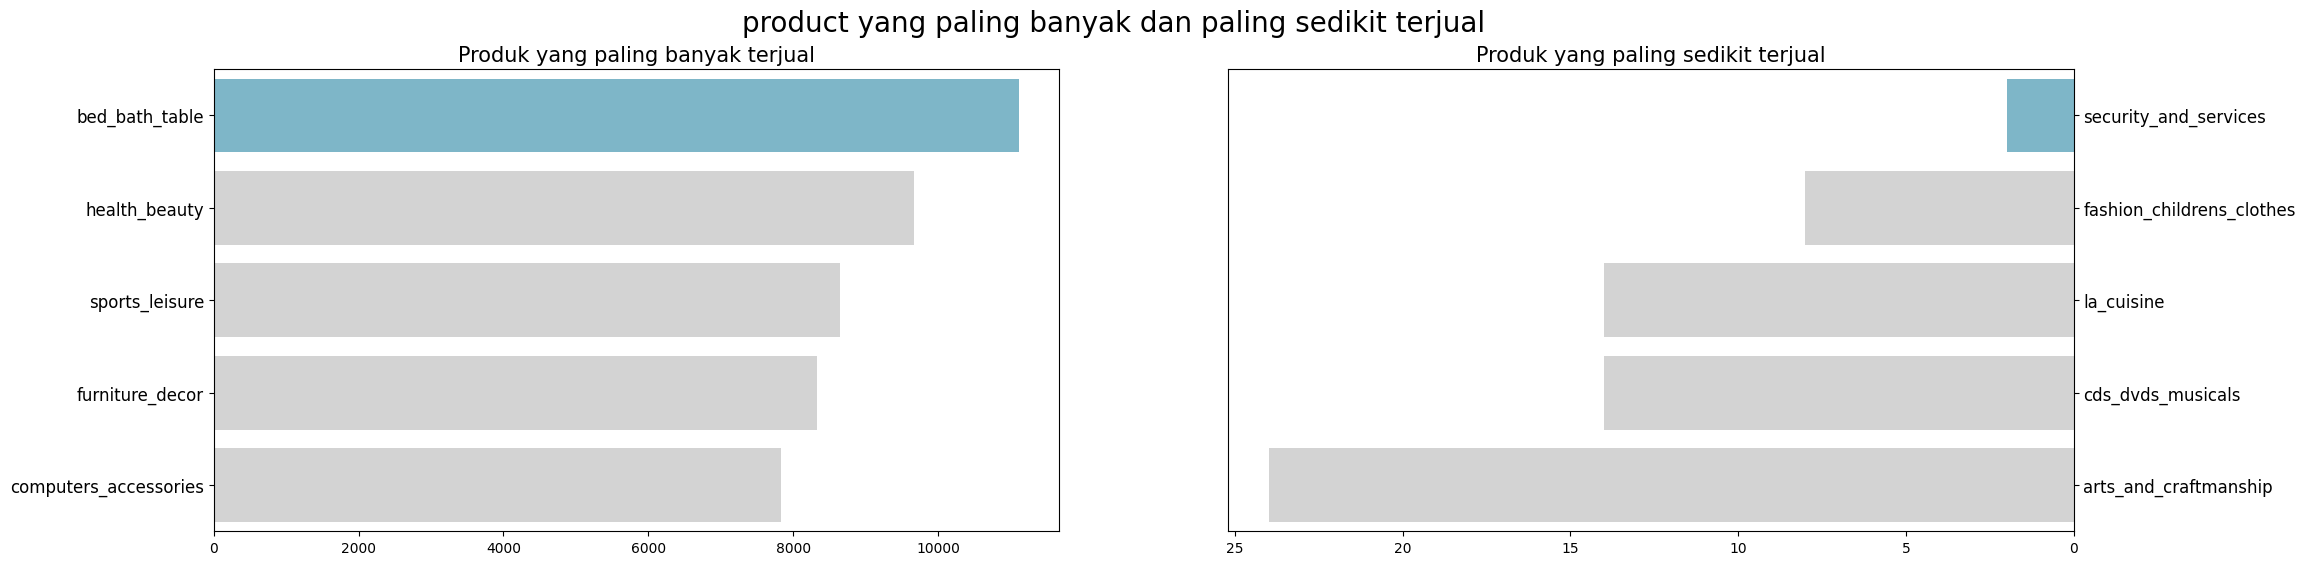

In [180]:
fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x = 'total',
    y = 'product_category_name_english',
    data = product_laris_item_df.sort_values(by='total', ascending=False).head(5),
    palette=colors,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk yang paling banyak terjual", loc='center', fontsize=15)
ax[0].tick_params(axis = 'y', labelsize = 12)

sns.barplot(
    x = 'total',
    y = 'product_category_name_english',
    data = product_laris_item_df.sort_values(by='total', ascending=True).head(5),
    palette=colors,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_title("Produk yang paling sedikit terjual", loc='center', fontsize=15)
ax[1].tick_params(axis = 'y', labelsize=12)

plt.suptitle("product yang paling banyak dan paling sedikit terjual", fontsize=20)
plt.show()

### Pertanyaan 4 : Product dengan omset terkecil dan terbesar

In [181]:
product_laris_df.sort_values(by='total',ascending=False).head(5)

,product_category_name_english,total
43,health_beauty,1258681.34
70,watches_gifts,1205005.68
7,bed_bath_table,1036988.68
65,sports_leisure,988048.97
15,computers_accessories,911954.32


In [182]:
product_laris_df.sort_values(by='total',ascending=True).head(5)

,product_category_name_english,total
61,security_and_services,283.29
29,fashion_childrens_clothes,569.85
11,cds_dvds_musicals,730.00
46,home_comfort_2,760.27
35,flowers,1110.04


C:\Users\ASUS\AppData\Local\Temp\ipykernel_38468\3463535033.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_38468\3463535033.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


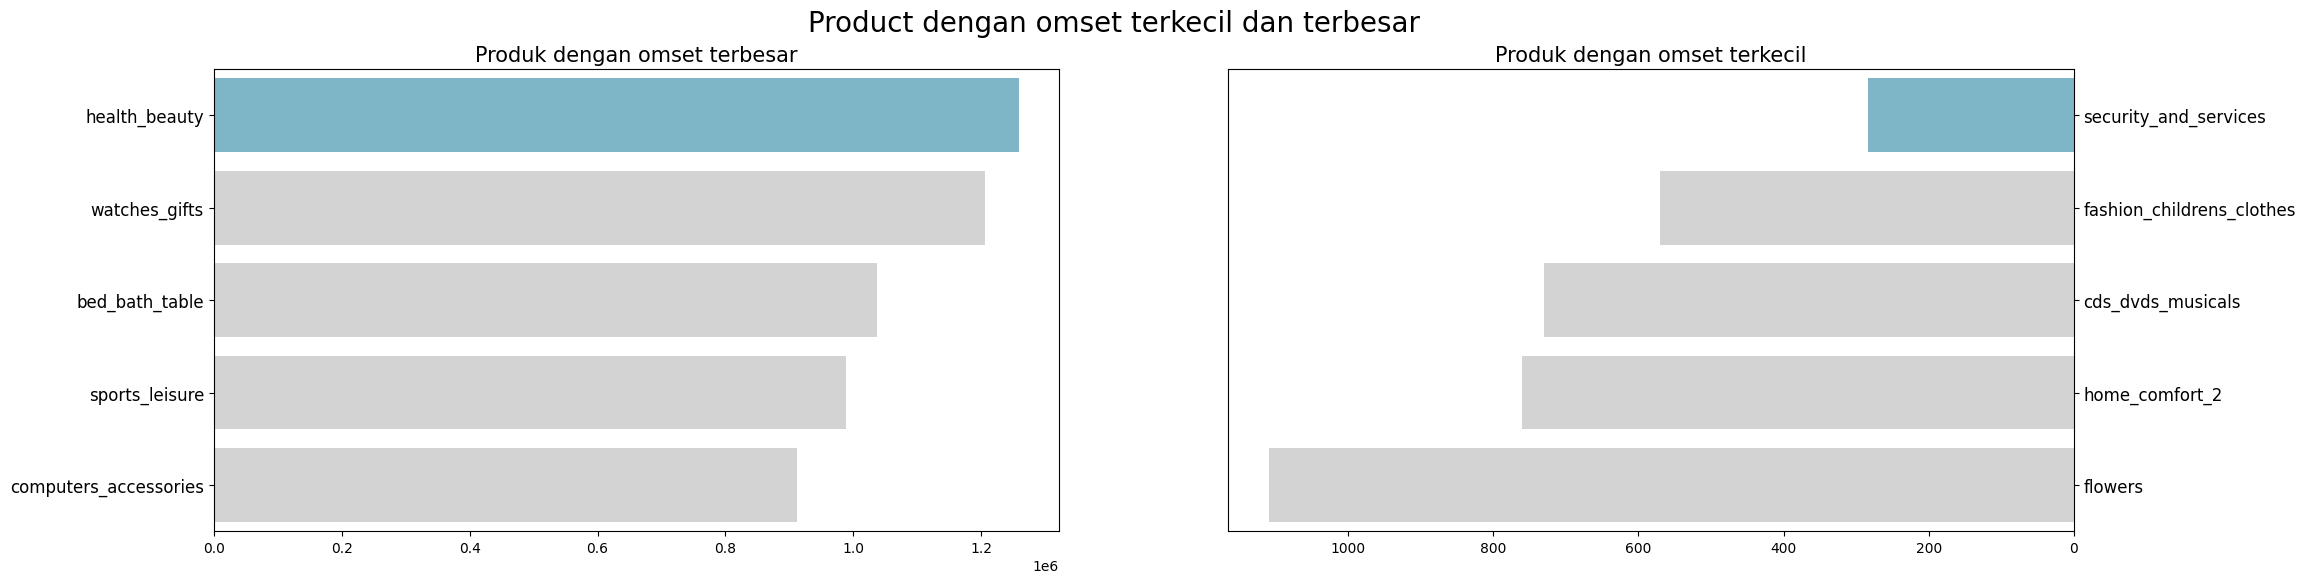

In [183]:
fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x = 'total',
    y = 'product_category_name_english',
    data = product_laris_df.sort_values(by='total', ascending=False).head(5),
    palette=colors,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk dengan omset terbesar", loc='center', fontsize=15)
ax[0].tick_params(axis = 'y', labelsize = 12)

sns.barplot(
    x = 'total',
    y = 'product_category_name_english',
    data = product_laris_df.sort_values(by='total', ascending=True).head(5),
    palette=colors,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_title("Produk dengan omset terkecil", loc='center', fontsize=15)
ax[1].tick_params(axis = 'y', labelsize=12)

plt.suptitle("Product dengan omset terkecil dan terbesar", fontsize=20)
plt.show()

### Pertanyaan 5 : Bagaimana performa penjualan

In [184]:
purchased_per_time

,order_purchase_timestamp,total
0,2016-09-30,6
1,2016-10-31,363
2,2016-11-30,0
3,2016-12-31,1
4,2017-01-31,955
5,2017-02-28,1951
6,2017-03-31,3000
7,2017-04-30,2684
8,2017-05-31,4136
9,2017-06-30,3583


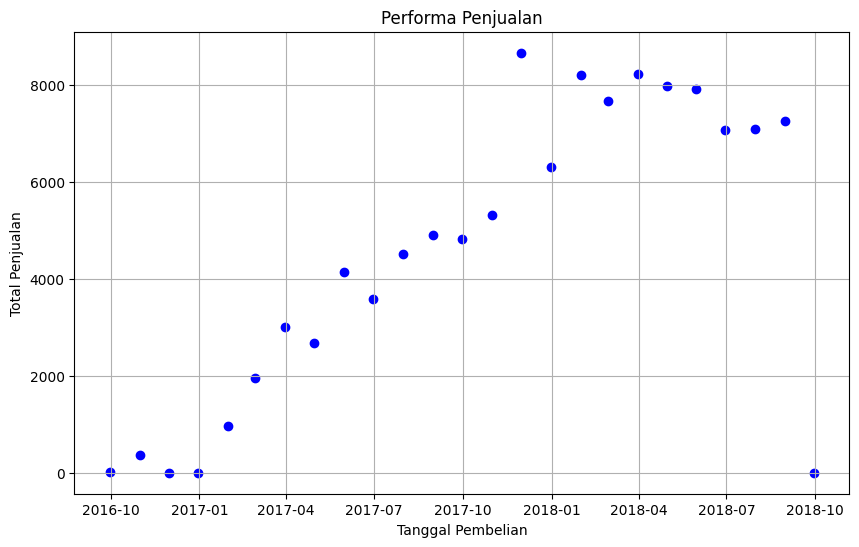

In [185]:
plt.figure(figsize=(10, 6))
plt.scatter(purchased_per_time['order_purchase_timestamp'], purchased_per_time['total'], color='blue', marker='o', linestyle='-')
plt.title('Performa Penjualan')
plt.xlabel('Tanggal Pembelian')
plt.ylabel('Total Penjualan')
plt.grid(True)
plt.show()

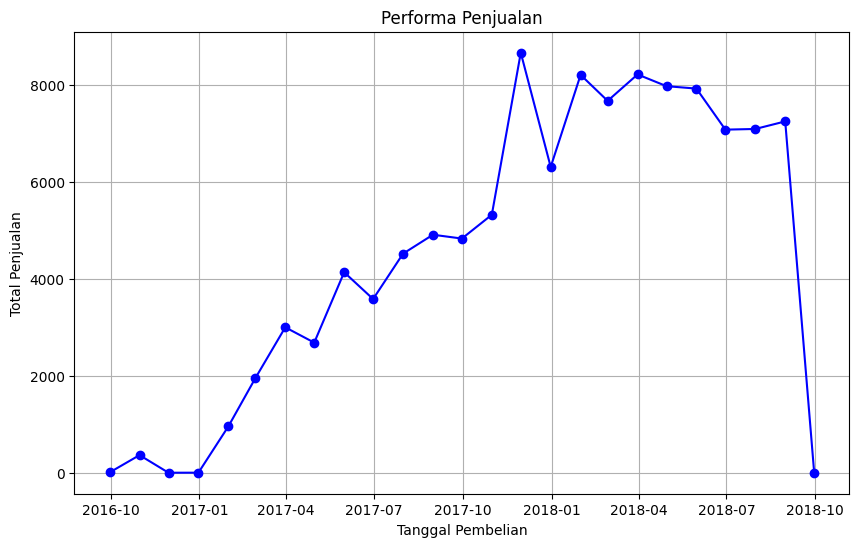

In [186]:
plt.figure(figsize=(10, 6))
plt.plot(purchased_per_time['order_purchase_timestamp'], purchased_per_time['total'], marker='o', color='blue', linestyle='-')
plt.title('Performa Penjualan')
plt.xlabel('Tanggal Pembelian')
plt.ylabel('Total Penjualan')
plt.grid(True)
plt.show()

## Conclusion

- Conclution pertanyaan 1

    Kota yang memiliki penjualan terbanyak 5 terbesar adalah
    
    - sao paulo
    - rio de janeiro
    - belo horizonte
    - brasilia
    - curitiba

    Sedangkan kota yang memiliki penjualan terendah 5 terbawah adalah 

    - lagoao
    - buriti alegre
    - sulina
    - buique
    - bugre

    Pada negara (state) dengan penjualan terbanyak adalah

    - SP
    - RJ
    - MG
    - RS
    - PR

    Pada negara (state) dengan penjualan terendah adalah

    - RR
    - AP
    - AC
    - AM
    - RO

- Conclution pertanyaan 2

    kota dengan pengeluaran pada toko online terbanyak adalah
    - sao paulo
    - rio de janeiro
    - belo horizonte
    - brasilia
    - curitiba

    kota dengan pengeluaran pada toko online terendah adalah
    - polo petroquimico de triunfo
    - sabaudia
    - santo antonio do rio abaixo
    - senador jose porfirio
    - jenipapo de minas

- Conclution pertanyaan 3

    Produk yang paling laris adalah
    - bed_bath_table	
    - health_beauty	
    - sports_leisure	
    - furniture_decor	
    - computers_accessories	

    Produk yang kurang laris adalah
    - security_and_services
    - fashion_childrens_clothes
    - la_cuisine
    - cds_dvds_musicals
    - arts_and_craftmanship

- Conclution pertanyaan 4
    
    Produk dengan omset terbesar adalah
    - health_beauty
    - watches_gifts
    - bed_bath_table
    - sports_leisure
    - computers_accessories

    Produk dengan omset terendah adalah
    - security_and_services
    - fashion_childrens_clothes
    - cds_dvds_musicals
    - home_comfort_2
    - flowers

- Conclution pertanyaan 5

    pada performa penjualan setiap bulannya selalu mengalami fluktuatif, tapi cenderung mengalami pengingkatan